In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

In [4]:
(x_train, y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()
x_train.shape

170500096/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [6]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

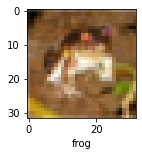

In [13]:
plot_sample(x_train, y_train, 0)

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [16]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.8128 - accuracy: 0.3537
Epoch 2/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.6254 - accuracy: 0.4240
Epoch 3/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.5407 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 98s 62ms/step - loss: 1.4825 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4329 - accuracy: 0.4956


In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.44      0.50      1000
           1       0.29      0.88      0.43      1000
           2       0.48      0.15      0.23      1000
           3       0.31      0.39      0.35      1000
           4       0.50      0.29      0.37      1000
           5       0.49      0.25      0.33      1000
           6       0.45      0.60      0.52      1000
           7       0.75      0.32      0.44      1000
           8       0.63      0.44      0.51      1000
           9       0.41      0.41      0.41      1000

    accuracy                           0.42     10000
   macro avg       0.49      0.42      0.41     10000
weighted avg       0.49      0.42      0.41     10000



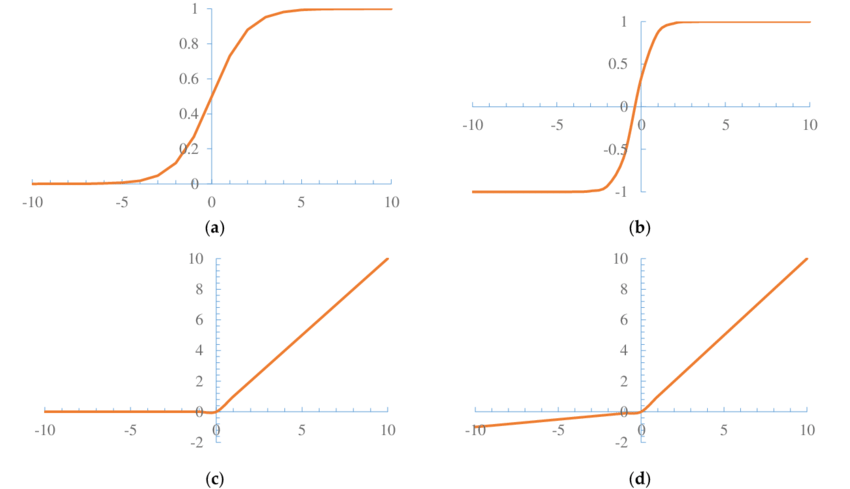



(a) Sigmoid function; (b) Tanh function; (c) ReLU function; (d) Leaky ReLU function.







In [19]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# filters is nothing but features , kernal_size is the multiplied square matrix

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3978 - accuracy: 0.5027
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1314 - accuracy: 0.6012
Epoch 3/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0040 - accuracy: 0.6497
Epoch 4/5
1563/1563 [==============================] - 60s 39ms/step - loss: 0.9264 - accuracy: 0.6789
Epoch 5/5
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8685 - accuracy: 0.6987


In [24]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9349 - accuracy: 0.6755


[0.9348835945129395, 0.6754999756813049]

In [25]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[1.00291474e-02, 3.95478739e-04, 1.06659327e-02, 7.72609234e-01,
        8.36114166e-04, 1.79315627e-01, 2.02837829e-02, 2.49350880e-04,
        4.22590878e-03, 1.38945307e-03],
       [3.87928193e-03, 1.96600243e-01, 1.38917258e-05, 2.42187270e-05,
        6.14842884e-06, 5.07063987e-07, 1.05830782e-06, 5.57874455e-06,
        7.90963471e-01, 8.50566942e-03],
       [7.51719028e-02, 5.00112891e-01, 5.18738339e-03, 3.57317999e-02,
        2.45748763e-03, 3.91802937e-03, 1.51182327e-03, 3.81939975e-03,
        2.57239044e-01, 1.14850126e-01],
       [6.65497422e-01, 1.99595056e-02, 8.26656967e-02, 3.82948481e-03,
        4.52884994e-02, 1.09707522e-04, 8.47913790e-04, 5.41452551e-04,
        1.80055514e-01, 1.20472512e-03],
       [6.14185192e-05, 2.28343779e-04, 4.01131622e-02, 7.22533539e-02,
        1.32714063e-01, 1.40921269e-02, 7.40072072e-01, 9.34841228e-05,
        2.60186178e-04, 1.11745940e-04]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

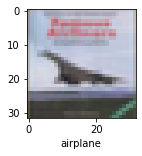

In [28]:
plot_sample(x_test, y_test,3)

In [ ]:
classes[y_classes[3]]

In [29]:
classes[y_classes[3]]

'airplane'

In [31]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.80      0.80      0.80      1000
           2       0.55      0.55      0.55      1000
           3       0.46      0.55      0.50      1000
           4       0.71      0.47      0.56      1000
           5       0.58      0.62      0.60      1000
           6       0.69      0.79      0.74      1000
           7       0.74      0.72      0.73      1000
           8       0.82      0.74      0.78      1000
           9       0.75      0.78      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

